<a href="https://colab.research.google.com/github/HarshPatil1810/Python/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Install missing libraries (if any)
!pip install seaborn

# Import libraries
import pandas as pd                # Data manipulation
import numpy as np                 # Numerical operations
import matplotlib.pyplot as plt    # Data visualization
import seaborn as sns              # Advanced visualizations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files     # File upload and download


In [12]:
# Upload CSV file
uploaded = files.upload()

# Load the dataset
csv_file = list(uploaded.keys())[0]
data = pd.read_csv(csv_file)

# Display basic info
print(f"Uploaded CSV: {csv_file}")
print(f"Shape: {data.shape}")
print("First 5 rows:")
data.head()


Saving gate_applicants.csv to gate_applicants (2).csv
Uploaded CSV: gate_applicants (2).csv
Shape: (70, 6)
First 5 rows:


,Unnamed: 0,Paper Code,Paper Name,Applied,Appeared,Year
0,0,AE,Aerospace Engineering,4639,3697,2019
1,1,AG,Agricultural Engineering,2088,1848,2019
2,2,AR,Architecture and Planning,11208,9105,2019
3,3,BT,Biotechnology,11295,9348,2019
4,4,CE,Civil Engineering,170999,145064,2019


In [13]:
# Display missing values count
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values with mean/most frequent value based on data type
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical columns
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:                            # Numerical columns
        data[col].fillna(data[col].mean(), inplace=True)

print("\nAfter Handling Missing Values:")
print(data.isnull().sum())



Missing Values:
Unnamed: 0    0
Paper Code    0
Paper Name    0
Applied       0
Appeared      0
Year          0
dtype: int64

After Handling Missing Values:
Unnamed: 0    0
Paper Code    0
Paper Name    0
Applied       0
Appeared      0
Year          0
dtype: int64


<ipython-input-13-448d82be2f42>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-13-448d82be2f42>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [14]:
print("\nData Types:")
print(data.dtypes)



Data Types:
Unnamed: 0     int64
Paper Code    object
Paper Name    object
Applied        int64
Appeared       int64
Year           int64
dtype: object


In [15]:
# Convert date columns automatically
for col in data.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Add year, month, and day if date column exists
if any(data.dtypes == 'datetime64[ns]'):
    for col in data.select_dtypes(include='datetime'):
        data['Year'] = data[col].dt.year
        data['Month'] = data[col].dt.month
        data['Day'] = data[col].dt.day

# Display the updated dataset
print("\nAfter Feature Engineering:")
data.head()



After Feature Engineering:


,Unnamed: 0,Paper Code,Paper Name,Applied,Appeared,Year
0,0,AE,Aerospace Engineering,4639,3697,2019
1,1,AG,Agricultural Engineering,2088,1848,2019
2,2,AR,Architecture and Planning,11208,9105,2019
3,3,BT,Biotechnology,11295,9348,2019
4,4,CE,Civil Engineering,170999,145064,2019


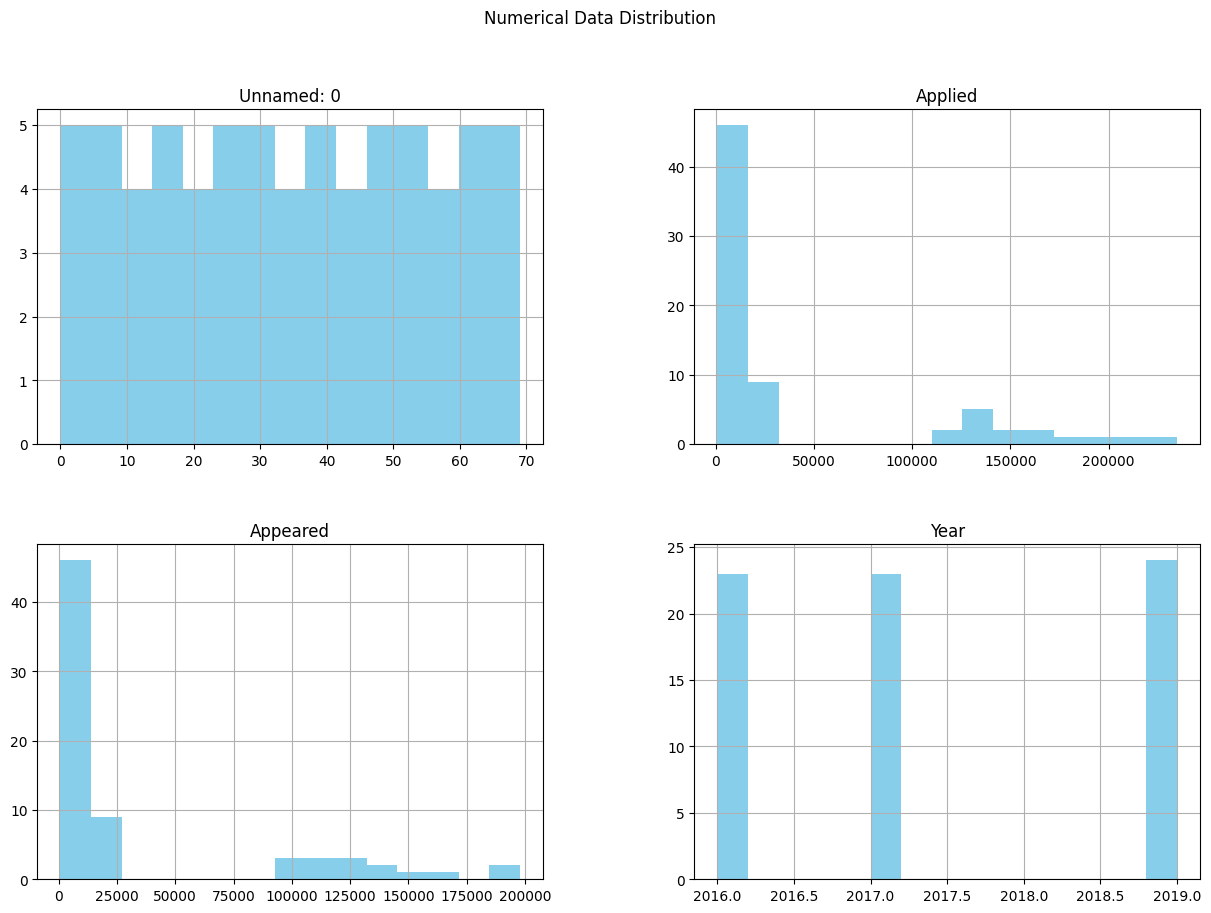

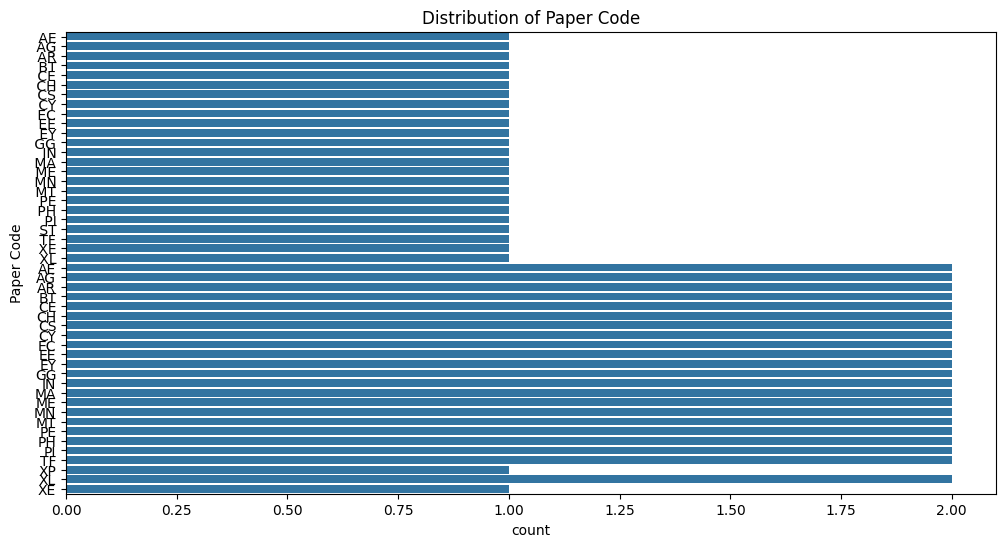

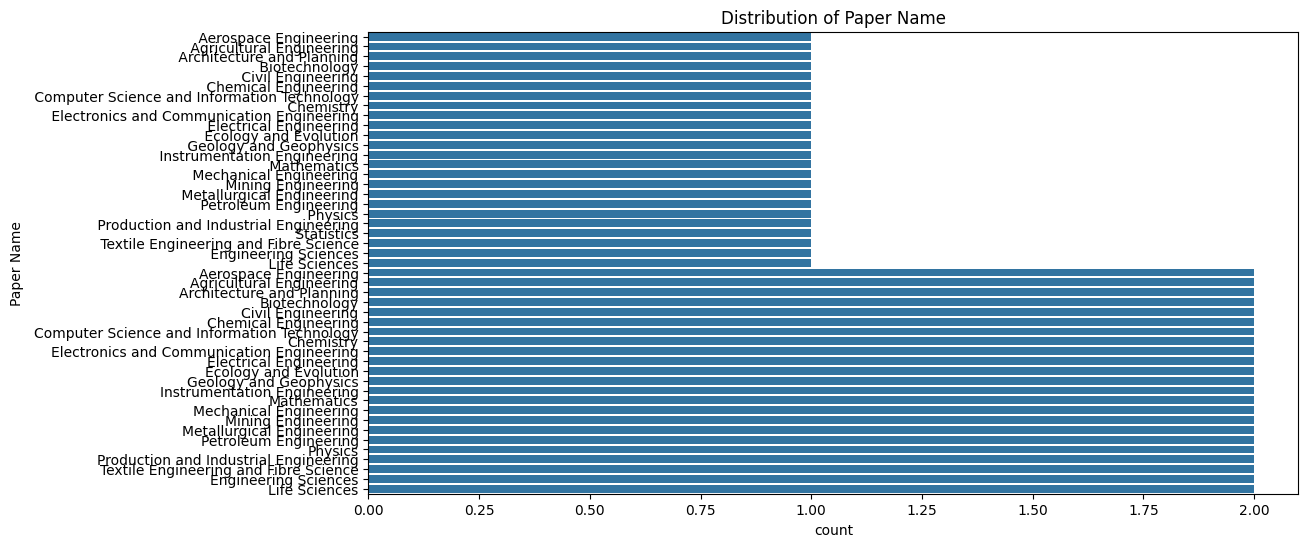

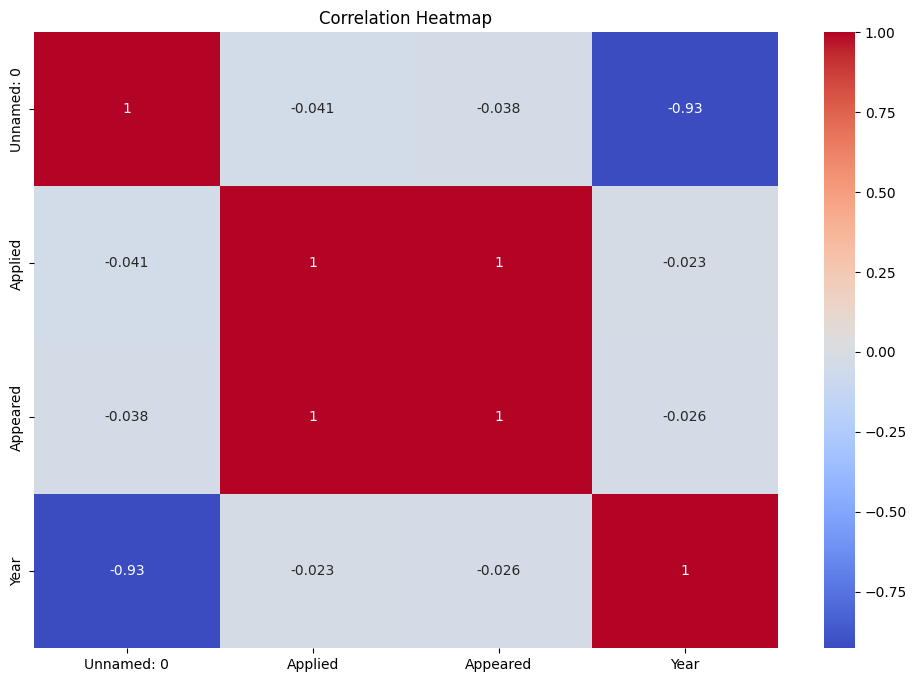

In [16]:
# ✅ Step 7: Dynamic Visualization

# 🔥 1. Visualize Numerical Data (Histograms)
if len(data.select_dtypes(include='number').columns) > 0:
    data.select_dtypes(include='number').hist(bins=15, figsize=(15, 10), color='skyblue')
    plt.suptitle('Numerical Data Distribution')
    plt.show()

# 🔥 2. Visualize Categorical Data (Bar Charts)
cat_cols = data.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    for col in cat_cols:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=col, data=data)
        plt.title(f'Distribution of {col}')
        plt.show()

# 🔥 3. Correlation Heatmap (Filter Numeric Columns Only)
num_cols = data.select_dtypes(include='number')  # Filter only numeric columns
if num_cols.shape[1] > 1:  # Ensure at least 2 numerical columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()


In [17]:
# ✅ Import missing library
from sklearn.linear_model import LogisticRegression


In [18]:
# ✅ Import the missing accuracy_score function
from sklearn.metrics import accuracy_score


In [19]:
# Auto ML Model Selection
if data.select_dtypes(include='number').shape[1] >= 2:
    # Select numeric columns for ML
    X = data.select_dtypes(include='number').iloc[:, :-1]
    y = data.select_dtypes(include='number').iloc[:, -1]

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply Regression for continuous target
    if y.nunique() > 10:
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("\n🔥 Regression Model Results:")
        print(f"Mean Squared Error: {mse}")
        print(f"R^2 Score: {r2}")

    # Apply Classification for categorical target
    else:
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print("\n🔥 Classification Model Results:")
        print(f"Accuracy: {acc}")



🔥 Classification Model Results:
Accuracy: 1.0


In [20]:
# Export the modified CSV file
output_file = 'Analyzed_CSV_Report.csv'
data.to_csv(output_file, index=False)

# Download the file
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
!pip install pandas-profiling


  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.8.1
    Uninstalling visions-0.8.1:
      Successfully uninstalled visions-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [1]:
!pip install ydata-profiling


  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [2]:
from ydata_profiling import ProfileReport

In [3]:
# ✅ Generate a detailed profile report
# ✅ Import the updated profiling library

profile = ProfileReport(data, title="CSV Data Analysis Report", explorative=True)
profile.to_file("Data_Profile_Report.html")

# ✅ Download the report
from google.colab import files
files.download("Data_Profile_Report.html")


NameError: name 'data' is not defined